# Exploratory Data Analysis of Google Play Store apps

### Content:

 - Introduction 
 - Data description 
 - Researh questions 
 - Data preparation 
 - Data analysis
 - Conclusion 

# Introduction

 Google Play Store - is a distribution service established by Google. It allows side companies to spread and offer a variety    of applications compatible with Android operation system. Initially, Google announced the opening of Andorid Market online-shop on the 22nd of October in 2008. It provided a combination of music, book, video and games services. Talking exactly about applications, the developers pay a 25$ fee for a publication ability. 
 
 As a result of rebrending that took place in March, 2012, Android Market portal became a currently known Google Play Store. According to the monetization policy, the application developers basing on this platform recieve 70 percent of profit, while other 30 percent go for billing maintenance. From that time the folowing sequence of major updates was released: 2014 - paying with Paypal function; March, 2016 - free 10 minute game trial in browser function; April, 2016 - advertising opportunities. 
 
 As seen from the above, Google Play Market is a loyal and dynamic platform for app developers, thus there could be found more than 2,9 million applications on the free or paid base. The Google Play inludes 34 app categories such as Business, Health, Education, Arcade and etc. Overall, users from 145 country have an opportunity to install and users from 150 countries could spread applications. 

Retrieved from: https://ru.wikipedia.org/wiki/Google_Play

# Data description

Google Play Store phenomenon provides quite a huge base for a variety of analysises from different aspects. It would be beneficial to analyze the efficiency of particular applications grouped by size, rating, genre etc. for future app publications. The current analysis would be based on the "Google Play Store Apps" Kaggle dataset initially scraped from Google Play Store by Lavanya Gupta(https://www.kaggle.com/lava18/google-play-store-apps). The dataset is relatively new, dated by 2018.

It consist of two .csv files but the major and the most informative part enough for analysis purposes is in the googleplaystore.csv and the second file contains too much missing values, therefore the decision not to use the second file was made. The following parameters from googleplaystore.csv will be used: 

- Application name - as given in Google Play Store
- Category - the category the app belongs to
- Rating - position in the user rating on the scrapping moment
- Reviews - number of reviews on the scrapping moment
- Size - the size of application 
- Installs - number of user downloads
- Type - either paid or free base described
- Price - the amount payed for installation if needed
- Content Rating - targetted age group 
- Genre - an additional subcategory if exists
- Last Updated - last available update



# Research questions 

In the result of this analysis 5 main questions would be answered: 

1. Analyze wether the application type(free/paid) influences the rating it has.
2. Analyze the relationship between the size of the app and the rating.
3. Analyze the distribution of pay-based applications amoung different categories.
4. Analyze applications of which content rating are the most popular.
5. Anlayze application categories from the pricing side. 

# Data preparation

Data preparation will be conducted in several steps using pandas and numpy. In order to identify the exact actions to be made the data will be retrived from the .csv file and generally examined by the following code

In [1]:
#importing pandas module
import pandas as pd
#retrieving data from .csv file
apps = pd.read_csv('googleplaystore.csv')
#showing 5 first rows
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [2]:
 print('Dataset parameters are:', apps.shape)

Dataset parameters are: (10841, 13)


Which actually means that dataset contains 10841 observation and 13 parameter columns

The primary data description shows that '+' signs are present in Installs and Size column just shows the Kilo/Mega units. 

At this moment further data preparation steps are clear:

- Remove unnecessary columns
- Remove duplicate rows
- Identify missing values and replace/delete them 
- Convert inappropriate values in some columns so that it would be easier to work with them

#### 1. Table redesigning 

In context of current analysis "Current ver" and "Android ver" columns are not required. Therefore, the code above will deal with this aspect by deleting columns

In [3]:
#deleting column with "Current Ver" name from apps
del apps ["Current Ver"]
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up


In [4]:
#deleting column with "Android Ver" name from apps
del apps ["Android Ver"]
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


As a result dataset has 11 columns.

The code below is devoted to deleting any duplications, as a result 10358 observations are left.

In [5]:
#assiging new table without any duplications
apps = apps.drop_duplicates()
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


#### 2. Missing values 

The following code shows the total number of missing values by each parameter. 

In [6]:
 apps.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
dtype: int64

As could be seen, the most missed column is Rating, which is also very important, therefore it could not be dropped, however missing values cound not be replaced or interpollated as well, due to the fact that Rating, Type, Content Rating columns do not have any trend or prediction opportunity. Thus, as the total number of observations is quite huge, dropping of NULL rows will be executed further.

In [7]:
#dropping rows with Nan values in the following subset of columns
apps.dropna(subset = ["Rating", "Type", "Content Rating"], inplace=True)
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017"
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015"


Another problem to deal with is "Varies with device" values in some columns. The code shows 1468 rows with such value. This might mess up the further analysis, thus they should be replaced with NaN and dealt with.

In [8]:
apps.loc[apps["Size"] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018"
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018"
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018"
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018"
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018"
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017"
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018"
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018"


In [9]:
#importing numpy module
import numpy as np
#replacing "Varies with device" values with NaN
apps = apps.replace(to_replace = "Varies with device", value =np.nan)  
#dropping NaN values
apps.dropna(subset = ["Size"], inplace=True)
#showing the result
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014"
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017"
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018"


The previous code replaced all "Varies with device" values to NaN and then dropped all rows with NaN values. Now, records in the whole table are full.

#### 3. Values converting

Further analysis requires Size and Installs columns to be numeric, however, they have units and '+' sign respectively. The next code lines will convert these columns values into the proper type.

In order to make Size values numeric, firstly the Kilo and Mega letters were replaced with "000" and "000000" respectively and then, the whole value was converted to numeric.

In [10]:
apps.Size = apps.Size.str.replace('k','000')
apps.Size = apps.Size.str.replace('M','000000')
apps.Size = pd.to_numeric(apps.Size)
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014"
10834,FR Calculator,FAMILY,4.0,7,2.6,500+,Free,0,Everyone,Education,"June 18, 2017"
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018"


The same logic was followed to remove plus sign and commas and convert to numeric type the Installs column

In [11]:
apps.Installs = apps.Installs.str.replace('+','')
apps.Installs = apps.Installs.str.replace(',','')
apps.Installs = pd.to_numeric(apps.Installs)
apps


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,Free,0,Everyone,Books & Reference,"March 23, 2014"
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0,Everyone,Education,"June 18, 2017"
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone,Education,"July 6, 2018"


On this stage the dataset is clean and well-shaped. No null values are present as seen from the below 

In [12]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7424 non-null   object 
 1   Category        7424 non-null   object 
 2   Rating          7424 non-null   float64
 3   Reviews         7424 non-null   object 
 4   Size            7424 non-null   float64
 5   Installs        7424 non-null   int64  
 6   Type            7424 non-null   object 
 7   Price           7424 non-null   object 
 8   Content Rating  7424 non-null   object 
 9   Genres          7424 non-null   object 
 10  Last Updated    7424 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 696.0+ KB


In [13]:
apps.describe()

,Rating,Size,Installs
count,7424.000000,7.424000e+03,7.424000e+03
mean,4.171309,2.084848e+07,7.823918e+06
std,0.549729,2.490609e+07,4.630411e+07
min,1.000000,1.000000e+00,1.000000e+00
25%,4.000000,5.900000e+00,1.000000e+04
50%,4.300000,1.400000e+07,1.000000e+05
75%,4.500000,3.300000e+07,1.000000e+06
max,5.000000,1.000000e+08,1.000000e+09


After data preparation it could be concluded that the mean rating is quite high - 4.17

# Data analysis 

### Q1: Analyze wether the application type(free/paid) influences the rating it has. 

In order to answer this and other questions Seaborn and Matplotlib modules are used for visualization. 
This question requires following steps: 
1. Visualization: The box plot was chosen to show the possible relationship.


In [14]:
#importing modules
import matplotlib.pyplot as plt
import seaborn as sns 
#setting theme
sns.set_theme()

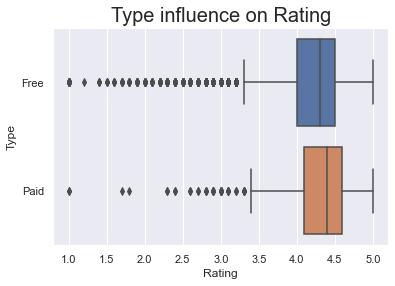

In [15]:
#Visualization 
boxplot = sns.boxplot(y ="Type", x = "Rating", data = apps); # plotting boxplot
plt.title("Type influence on Rating", size = 20); #title of the plot

The boxplot shows that paid applications have a little bit higher indexes than free ones. The average Rating and the minimum Rating of applications is higher for paid ones, but 75% of both free and paid applications lie within 4.0-4.6 interval. The number of outliers for paid apps is also smaller, which means users tend to rate paid applications higher. 

### Q2: Analyze relationship between the size of the app and the rating 

1. Data preparation: Converting Size column in MB for better vizualiations, so that '100' value means 100MB
2. Vizualization: The scatter plot is used for visualizing

In [16]:
# data preparation
apps['Size'] = apps['Size']/1000000 #converting to MB
apps.rename(columns = {'Size': 'SizeMB'}) #renaming the column
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0.000009,5000000,Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0.000003,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


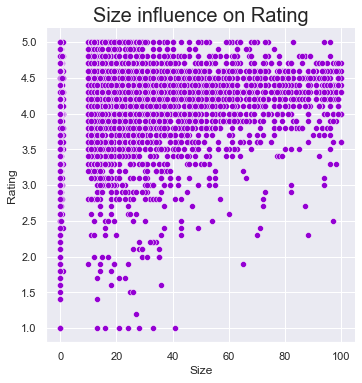

In [17]:
# Visualization
relplot = sns.relplot(x ="Size", y = "Rating",data = apps, color ='darkviolet'); # plotting scatter plot
plt.title("Size influence on Rating", size = 20); #title of the plot

The scatter plot illustrates that the applications with small sizes have both high and low ratings, while, large sized apps tend to have no less than 2.0 rating. At the same time the major part of applications with quite high rating(>=4.5) have average size from 15 to 40 MB.

### Q3: Analyze the distribution of pay-based applications amoung different categories

While working with Categories, it is more convenient to choose major ones for plotting due to the huge number of them present in the dataset. 
1. Data preparation: Creating a subset of major categories for further usage. 
2. Visualization: The histogram was chosen to show the distriBution of pay-based applications in contrast with free amoung considered categories.

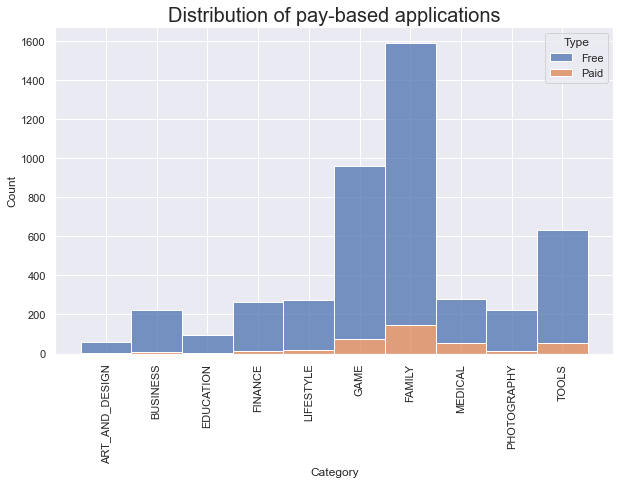

In [18]:
subset_apps = apps[apps.Category.isin(['ART_AND_DESIGN','EDUCATION','GAME', 
'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])] # create a subset of major categories
fig, a = plt.subplots()
fig.set_size_inches(10, 6); # foigure size defining
hist = sns.histplot(data = subset_apps, x = "Category", hue = "Type", multiple = "stack"); #plotting histogram 
plt.xticks(rotation = 90); #rotating X-axis labels by 90 degrees for readability 
plt.title("Distribution of pay-based applications", size = 20); #title of the graph


As shown in the histogram, the category with the highest proportion of pay-based applications is Family with about 180 paid applications. The second and the third are Game and Medical categories respectively. Both Art&Design  and Education categories do not have paid applications at all. Overall, it is clear that the pay-based applications are not frequent at all. The majority amoung all categories are free. 

### Q4: Analyze Applications of which content rating are the most popular

For this question both popularity amoung developers and amoung customers will be evaluated. 

#### Visualization 1: Applications number by Content Rating
The popluarity amoung developers could be measured by the number of apps present in each Content Rating category. For this purpose, the countplot was used. 

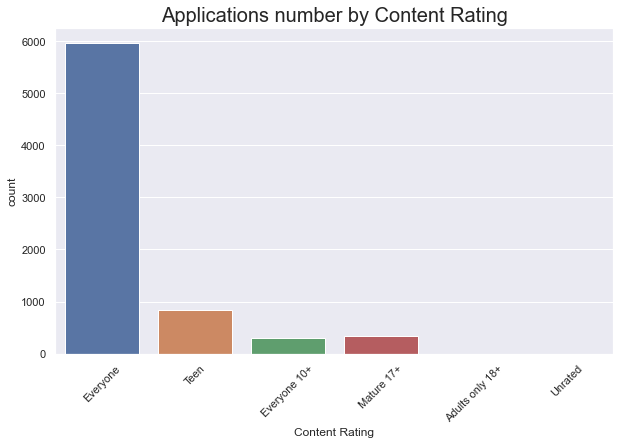

In [19]:
fig, b = plt.subplots()
fig.set_size_inches(10, 6); # the size of plot
qfour= sns.countplot(x ="Content Rating", data = apps); #the graph plotting itself
qfour.set_xticklabels(qfour.get_xticklabels(), rotation = 45); #rotation of labels for visibility
plt.title('Applications number by Content Rating',size = 20); #title of the graph

As could be seen from the graph the most popular Content Rating for developing an application is "Everyone". The number of applications with such Content Rating is about 6000. While the second Content Rating in terms of popularity is Teen with approximately 900 applications present.

#### Visualization 2: Installs number by Content Rating
The popularity amoung customers could be measured by the number of Installs made in each Content Rating category. For this purpose the barplot was used.

In [20]:
#data preparation
apps['Installs'] = apps['Installs']/100 #converting to MB
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,100.0,Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,5000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,0.000009,50000.0,Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,500000.0,Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,0.000003,1000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"


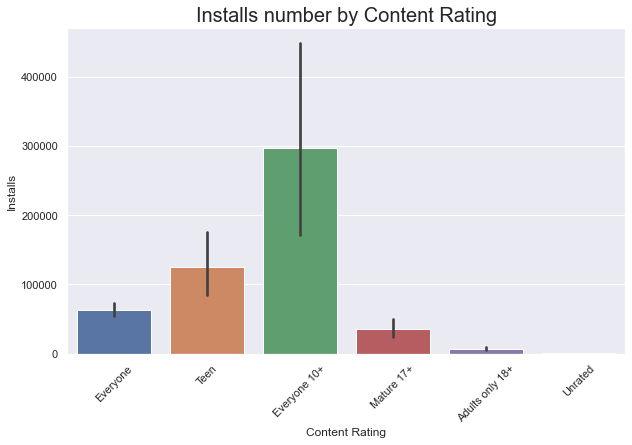

In [21]:
# visualization
fig, c = plt.subplots()
fig.set_size_inches(10, 6); # size of the plot
bar = sns.barplot(data = apps, x ="Content Rating", y = "Installs"); # plotting a barplot
plt.xticks(rotation = 45); # rotations of X-axis labels by 45 degrees
plt.title("Installs number by Content Rating", size = 20); # title of the barplot


This barplot, however, shows that customers' prefered Content Rating is "Everyone 10+". Similar with the previous observation, the second popular Content Rating group is "Teen". 

### Q5: Analyze applications categories from the pricing side

This question is dedicated to the concrete prices for each Category of applications. 
1. Data preparation: The Price column contains '$' signs, thus for proceeding it as a numeric in analysis this sign should be removed. Main categories should also be chosen.
2. Vizualization: For this purpose the catplot is used.

In [22]:
#data preparation
apps['Price'] = apps.Price.astype(str); #converting to string
apps.Price = apps.Price.str.replace('$',''); #removing $ sign
apps.Price = pd.to_numeric(apps.Price); # converting to numeric
apps.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.619000,10.0,Free,0.0,Everyone,Books & Reference,"March 23, 2014"
10834,FR Calculator,FAMILY,4.0,7,0.000003,5.0,Free,0.0,Everyone,Education,"June 18, 2017"
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,50.0,Free,0.0,Everyone,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,0.000004,1.0,Free,0.0,Everyone,Education,"July 6, 2018"
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.000000,100000.0,Free,0.0,Everyone,Lifestyle,"July 25, 2018"


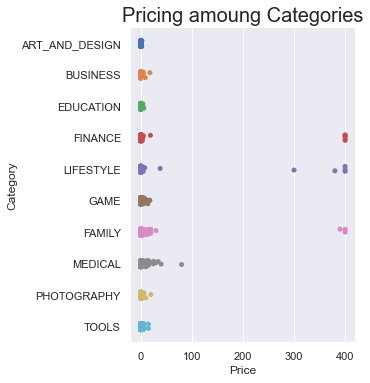

In [23]:
# data preparation
subset_apps = apps[apps.Category.isin(['ART_AND_DESIGN','EDUCATION', 'GAME', 'FAMILY', 'PHOTOGRAPHY',
'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]#retrieving needed categories
#visualization
sns.catplot(data = subset_apps, x = "Price", y = "Category"); #plotting catplot
plt.title("Pricing amoung Categories", size = 20); #title of the graph


The plot obviously shows that the majority of apps have 0 price or very close to it. Overall, the price for paid application is not higher than 100 dollars. However, surpisingly, there are some outliers whose price is 300$ and greater. They are present in Finance, Lifestyle and Family categories. If not considering them, the highest price have Medical applications. 

# Conclusion 

The results of this analysis show the current situation at the Google Play Store. But they also could be interpreted and used for applications that are developed currently. This analysis includes such insights as the preferable size, pricing and content rating in respect with rating and installs number. The conclusions for a successful application that might be made from this analysis are:

- the paid applications have higher average Rating ~ 4.4
- amoung paid applications the majority is priced less than 100$ and is quite close to 0 price
- paid applications are more frequently present in "Family" category, while the highest price goes to "Medical" apps
- the average sized(~15-40MB) applications have quite high Rating(>=4.5)
- the most popular target group for application developers is "Everyone"